# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})


In [2]:
student_data = student_data.sort_values(["Age"])

Draw a dispersion diagram (scatter plot) for the data.

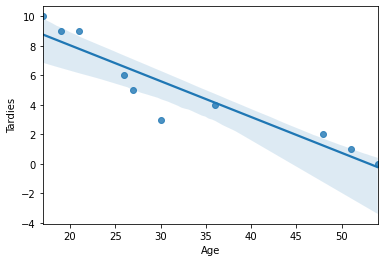

In [3]:
import seaborn as sns
sns.regplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
'''indeed by age the late arrivals seem to be decreasing'''


'indeed by age the late arrivals seem to be decreasing'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
#correlation refers to the scaled form of covariance.
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [6]:
#covariance is a measure of correlation.
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
from scipy import stats

In [8]:
X = student_data["Age"]
Y = student_data["Tardies"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))

The slope is: -0.24282077091598087
The intercept is: 12.888803363135771


In [9]:
'''
What will be your outcome variable? 

the outcome variable is Tardies 


What type of regression are you using?

linear regression
'''

'\nWhat will be your outcome variable? \n\nthe outcome variable is Tardies \n\n\nWhat type of regression are you using?\n\nlinear regression\n'

Plot your regression model on your scatter plot.

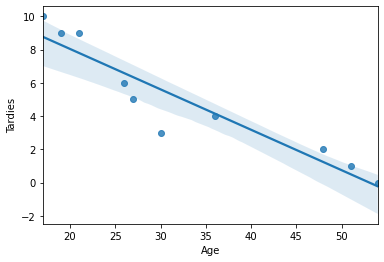

In [10]:
sns.regplot(x="Age", y="Tardies", data=student_data)

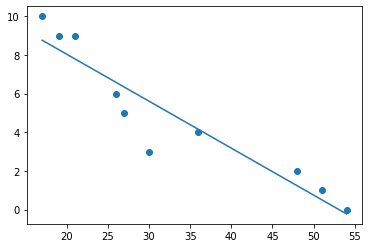

In [11]:
import matplotlib.pyplot as plt

regression_line = slope * X + intercept
plt.plot(X,regression_line)
plt.scatter(X,Y)

In [12]:
import statsmodels.api as sm

X = student_data['Age']
Y = student_data['Tardies']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           5.57e-05
Time:                        14:29:00   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
#the high R-squared value, 0.882 reveales that 88,2% of the data fit the regression model. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
vehicles = pd.read_csv('vehicles.csv')


In [15]:
Y = vehicles['CO2 Emission Grams/Mile']
X = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

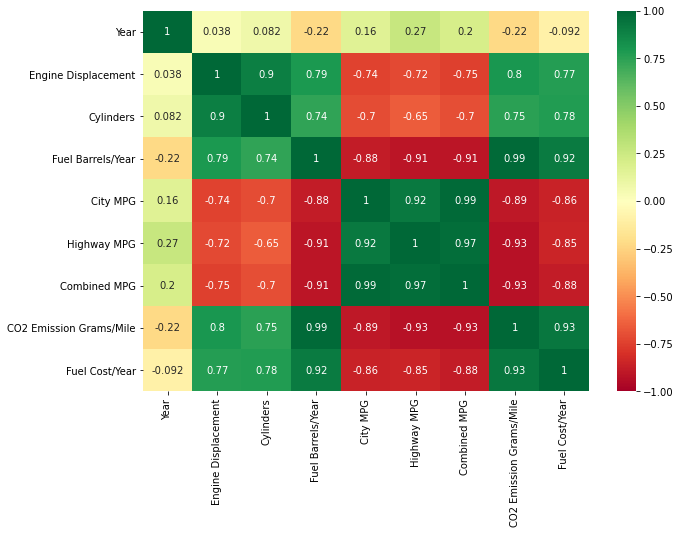

In [16]:
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(vehicles.corr(), cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
'''

Which variable do you think will be the most important in determining CO2 emissions? 
Fuel Barrels/Year with a 0.99 correlation



Which provides the least amount of helpful information for determining CO2 emissions?
Year with a correlation of -0.22

'''

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [21]:
import statsmodels.api as sm

X = vehicles[['Year', 'Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(y,X).fit()

predictions = model.predict(X)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [22]:
model.summary()


#What are the most important varibles in your model and why? 
# the model are Fuel Barrels/ Year and Combined MPG



#0,999% R squared value indicates that the model explains almost-all the variability of the response data around its mean.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):                        0.00
Time:                             14:31:16   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
party_data = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

In [25]:
party_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [37]:
# Linear regression

from scipy import stats

x = party_data['X'] # independent variable
y = party_data['Y'] # dependent variable

# perform a linear regression on these two variables 

result = stats.linregress(x,y)
result

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

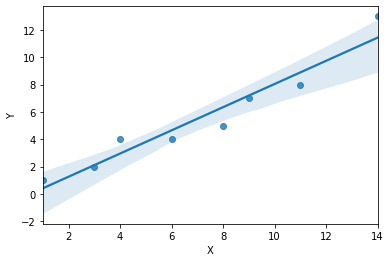

In [38]:
sns.regplot(party_data['X'], party_data['Y'])

In [40]:
# regressionline = result[1] + result[0]*x

# plt.plot(x, regression_line, c = 'red')
# plt.scatter(x,y)
# plt.show()


#the above gives me the following error: ValueError: x and y must have same first dimension, but have shapes (8,) and (10,)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
#strong correlation between invite and antendace  

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [43]:
party_no_outliers = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})

x = party_no_outliers['X'] # independent variable
y = party_no_outliers['Y'] # dependent variable

# perform a linear regression on these two variables 

results = stats.linregress(x,y)
results 


LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)

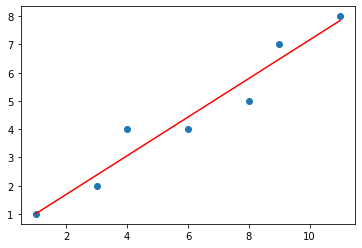

In [45]:
regression_line = results[1] + results[0]*x

plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [46]:
# the R-value increased, the regression line is closes to 100%
